C:\Users\Florian\AppData\Local\Temp\ipykernel_14592\3442386771.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  buffer_ = np.fromstring(h.read(), np.uint8)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


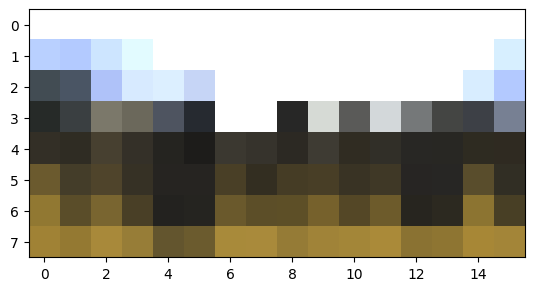

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


city tensor(27.5312, device='cuda:0')


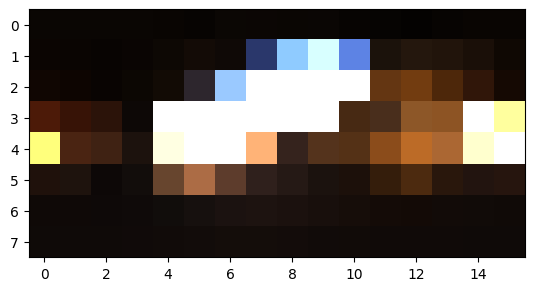

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


courtyard tensor(11.0938, device='cuda:0')


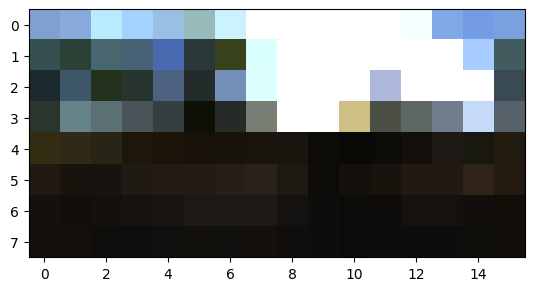

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


forest tensor(8.7852, device='cuda:0')


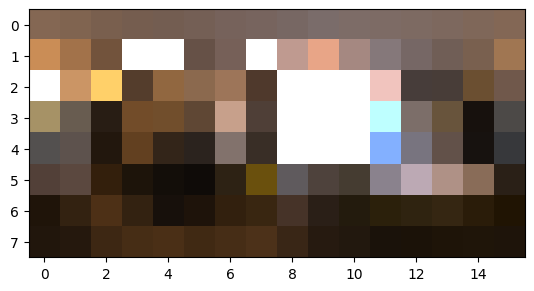

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


interior tensor(26.0146, device='cuda:0')


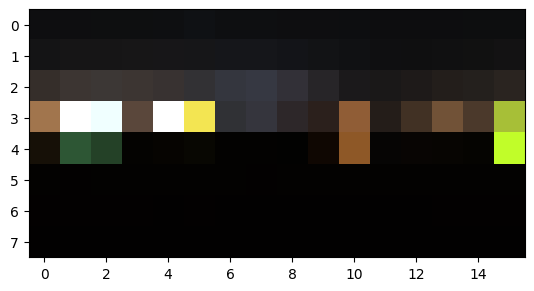

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


night tensor(5.2695, device='cuda:0')


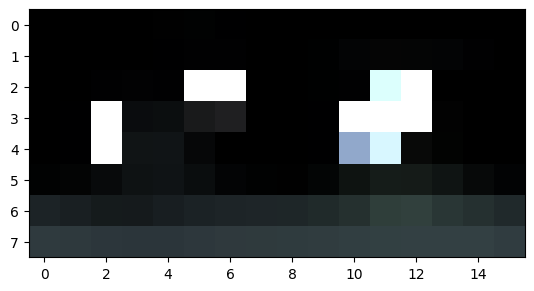

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


studio tensor(6.1572, device='cuda:0')


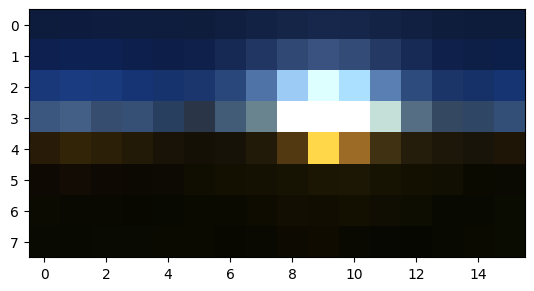

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


sunrise tensor(40.5938, device='cuda:0')


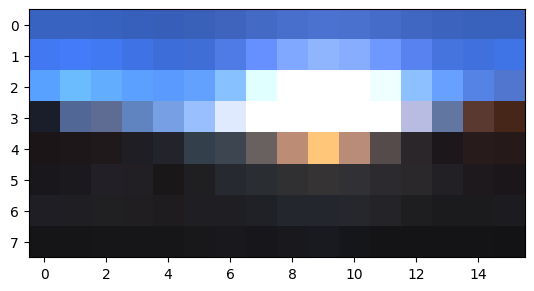

sunset tensor(6.5469, device='cuda:0')


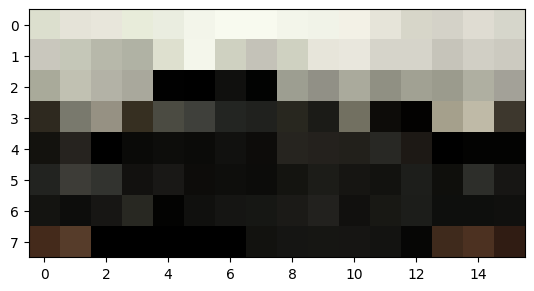

turing_probe tensor(0.9805, device='cuda:0')


In [6]:
import os
import cv2
from os.path import basename
import os.path as osp
import numpy as np
import torch
light_res = (8,16)
from collections import OrderedDict
import matplotlib.pyplot as plt

def read_hdr(path):
    """Reads an HDR map from disk.

    Args:
        path (str): Path to the .hdr file.

    Returns:
        numpy.ndarray: Loaded (float) HDR map with RGB channels in order.
    """
    import cv2
    with open(path, 'rb') as h:
        buffer_ = np.fromstring(h.read(), np.uint8)
    bgr = cv2.imdecode(buffer_, cv2.IMREAD_UNCHANGED)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb

novel_probes = OrderedDict()
for path in sorted(os.listdir('light-probes/')):
    if '.hdr' in path:
        name = basename(path)[:-len('.hdr')]
        arr = read_hdr(osp.join('light-probes/', path))
        arr = cv2.resize(arr, (light_res[1], light_res[0]), interpolation=cv2.INTER_LINEAR)
        plt.imshow(arr)
        plt.show()
        tensor = torch.from_numpy(arr).cuda()
        novel_probes[name] = tensor
        print (name, tensor.max())

pos: Parameter containing:
tensor([3.8128, 3.8861], requires_grad=True)
intens: Parameter containing:
tensor([2.8826], requires_grad=True)
sigma: Parameter containing:
tensor([0.8469], requires_grad=True)
ambient: Parameter containing:
tensor([0.4615], requires_grad=True)
torch.Size([8, 16, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


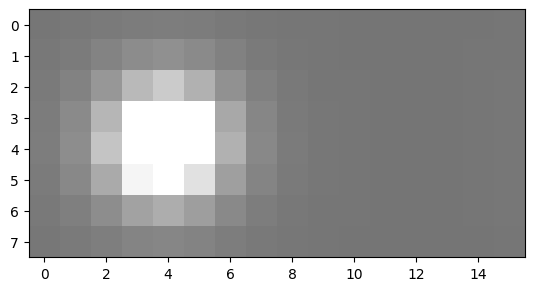

In [415]:

import torch

light_h = 8
light_res = (light_h, 2*light_h)
light_pos = torch.rand(2) * torch.Tensor(light_res).float()
light_intensity = torch.rand(1) * 3
light_sigma = torch.rand(1) * 0.5 + 0.5
light_ambient = torch.rand(1) * 0.5 

pos = torch.nn.Parameter(light_pos)
intens = torch.nn.Parameter(light_intensity)
sigma = torch.nn.Parameter(light_sigma)
ambient = torch.nn.Parameter(light_ambient)

def gen_light_grid(light_res):
    positions = torch.meshgrid(torch.arange(light_res[0]), torch.arange(light_res[1]))
    xs, ys = positions
    xs = xs.float()
    ys = ys.float()
    
    dy = torch.abs(ys - pos[1])
    dy = torch.min(dy, light_res[1] - dy)
    
    distance = torch.sqrt((xs - pos[0])**2 + dy**2)
    gaussian = torch.exp(-distance / sigma)
    light = intens * gaussian + ambient
    return light
    #light = light_intensity * gaussian + light_ambient
print(f"pos: {pos}")
print(f"intens: {intens}")
print(f"sigma: {sigma}")
print(f"ambient: {ambient}")
grid = gen_light_grid(light_res).unsqueeze(-1).repeat(1,1,3)
print (grid.shape)
plt.imshow(grid.cpu().detach().numpy())
plt.show()

